In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
#drop blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [6]:
df.shape

(11251, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [8]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [9]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(11239, 13)

In [12]:
# Changing of data type
df['Amount'] = df['Amount'].astype('int')

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# EDA

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

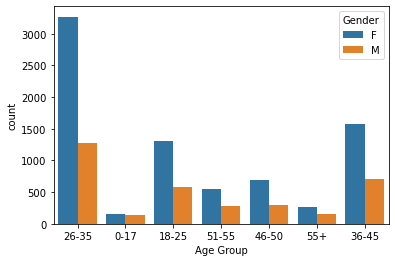

In [14]:
# Age group wise sales in Male & Female
ags = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ags.containers:
    ags.bar_label(bars)

In [15]:
df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

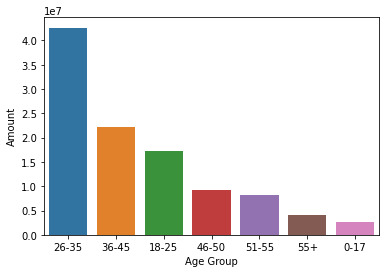

In [16]:
# Total Amount vs Age Group

age_sale = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = age_sale)

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

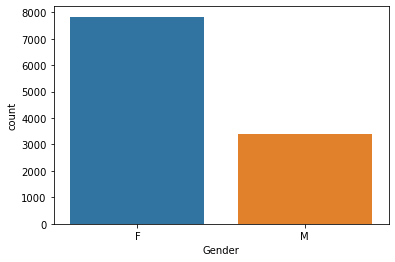

In [17]:
# plotting a bar chart for Gender 

gs = sns.countplot(x = 'Gender',data = df)

for bars in gs.containers:
    gs.bar_label(bars)

In [18]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

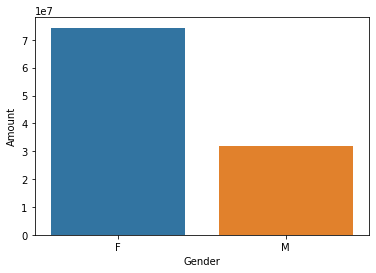

In [19]:
# plotting a bar chart for gender vs total amount

gen_sales = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = gen_sales)

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

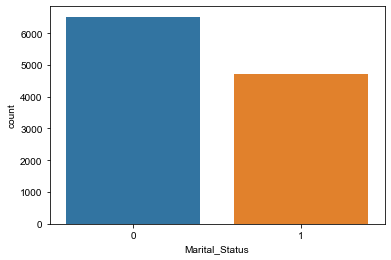

In [20]:
# Marital Status wise 
ms = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ms.containers:
    ms.bar_label(bars)

In [ ]:
marital_sales = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = marital_sales, x = 'Marital_Status',y= 'Amount', hue='Gender')

<AxesSubplot:xlabel='State', ylabel='Orders'>

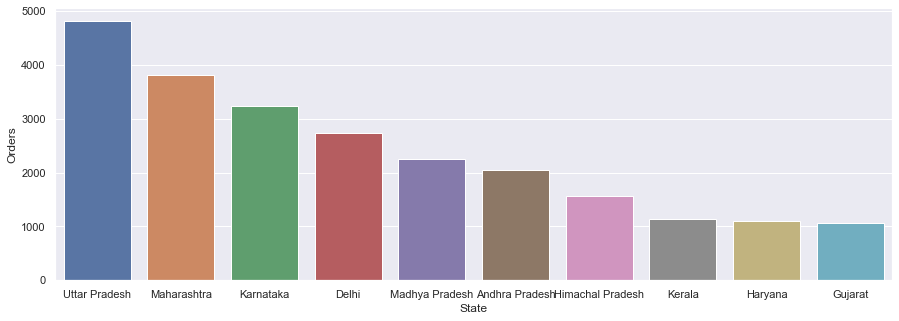

In [21]:
# top 10 states on the basis of number of orders

state_sale = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = state_sale, x = 'State',y= 'Orders')

<AxesSubplot:xlabel='State', ylabel='Amount'>

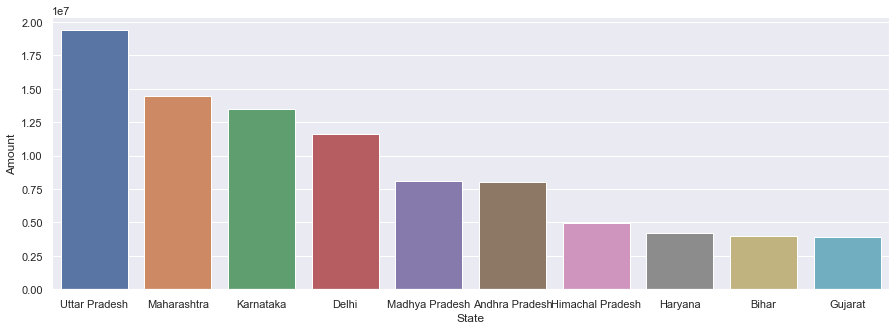

In [22]:
# top 10 states on the basis of total amount of sales 

state_sales = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = state_sales, x = 'State',y= 'Amount')

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

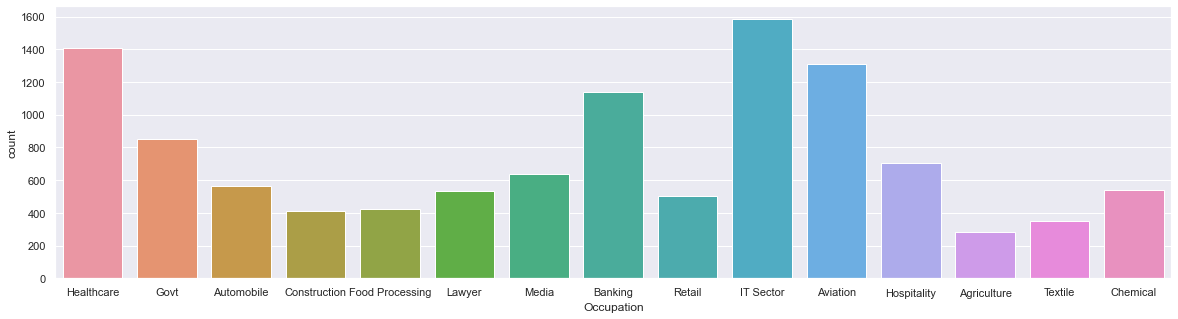

In [23]:
# Occupation wise 
sns.set(rc={'figure.figsize':(20,5)})

os = sns.countplot(data = df, x = 'Occupation')

for bars in os.containers:
    os.bar_label(bars)

In [ ]:
occupation_sales = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = occupation_sales, x = 'Occupation',y= 'Amount')

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

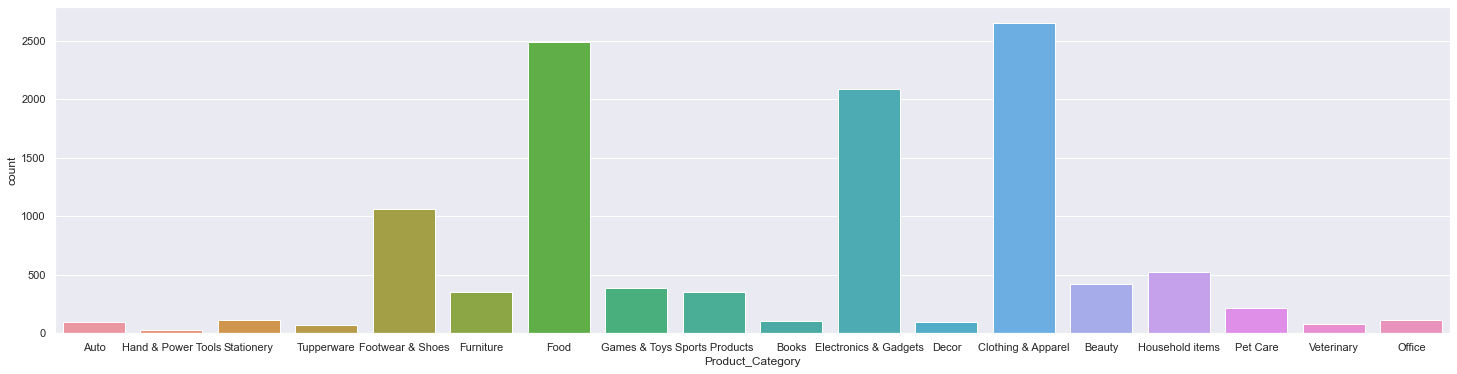

In [24]:
# Product category wise sales
sns.set(rc={'figure.figsize':(25,6)})
pcs = sns.countplot(data = df, x = 'Product_Category')

for bars in pcs.containers:
    pcs.bar_label(bars)

In [ ]:
prod_cat_sales = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(25,6)})
sns.barplot(data = prod_cat_sales, x = 'Product_Category',y= 'Amount')

In [ ]:
# Sales on the basis of product id
pid_sales = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = pid_sales, x = 'Product_ID',y= 'Orders')

<AxesSubplot:xlabel='Product_ID'>

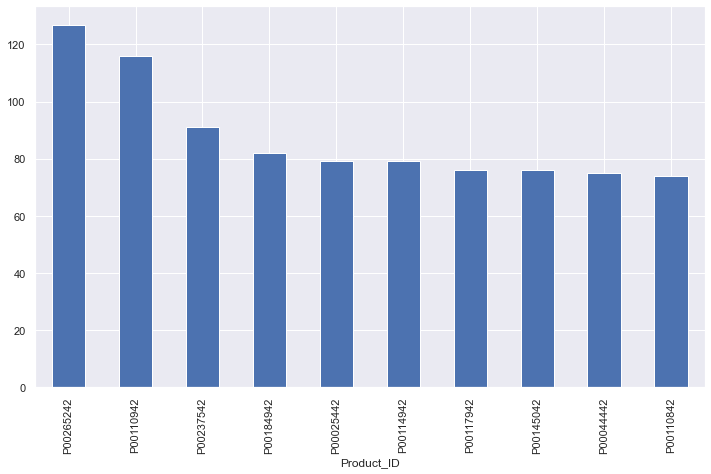

In [25]:
# top 10 most sold products

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

Married women falls under the age group of 26-35 yrs from Karnataka, Maharastra and UP. Who is working in IT, Healthcare and Aviation are more likely to buy products from Clothing, Food and Electronics category